<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_practice_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [22]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [23]:
torch.cuda.is_available()

True

In [24]:
tensor = torch.tensor([1, 2, 3])
print(tensor.device)  # CPU

cuda:0


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)

tensor

tensor([1, 2, 3], device='cuda:0')

# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [26]:
tensor = torch.randn(2, 3)

new = tensor.to(device)

# Отримання необхідної інформації
tensor_info = {
    "size": tensor.size(),
    "dtype": tensor.dtype,
    "device": new,
    "requires_grad": tensor.requires_grad
}

print(tensor_info)

{'size': torch.Size([2, 3]), 'dtype': torch.float32, 'device': tensor([[ 0.3679, -0.0099, -1.0052],
        [-2.3592, -0.2802,  0.5162]], device='cuda:0'), 'requires_grad': False}


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [27]:
tensor1 = torch.randn(100)
tensor2 = torch.randn(100)


mae = torch.mean(torch.abs(tensor1 - tensor2))
print(mae.item())

1.0207358598709106


# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [28]:
tensor1 = torch.randn(32, 28, 28)
tensor2 = torch.randn(16, 28, 28)
tensor3 = torch.randn(64, 28, 28)


result = torch.cat((tensor1, tensor2, tensor3), dim=0)


print(result.size())

torch.Size([112, 28, 28])


# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [29]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [30]:
from torch.optim import SGD

# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-3

# визначення алгоритму
optimizer = SGD([x],  # список тензорів, до яких застосуємо алгоритм
                lr=learning_rate,
                momentum=0.9
                )

for t in range(200):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 20 == 0:
      print(f'{loss.item() = }')

    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()


loss.item() = 1.3333334922790527
loss.item() = -0.22061127424240112
loss.item() = -0.26285481452941895
loss.item() = -0.2976280450820923
loss.item() = -0.29720568656921387
loss.item() = -0.2977892756462097
loss.item() = -0.2977856993675232
loss.item() = -0.29779261350631714
loss.item() = -0.29779285192489624
loss.item() = -0.29779285192489624


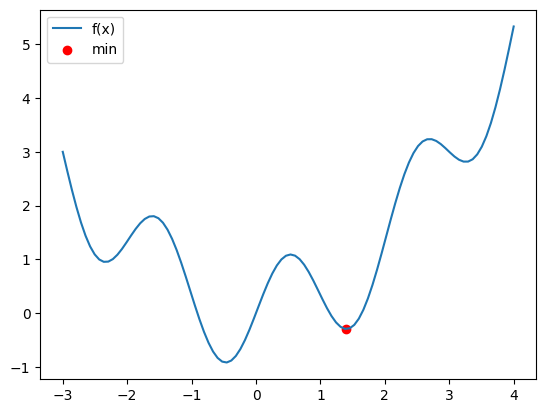

In [31]:
import matplotlib.pyplot as plt
import torch
import numpy as np

xs = torch.linspace(-3, 4, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.cpu().item(), f(x).cpu().item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [32]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2

In [33]:


# Встановимо пристрій на GPU, якщо доступно, або на CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [34]:
def gradient_descent(f, lr=1e-3, iterations=200):
    # Ініціалізуємо змінні x і y
    x = torch.tensor(2.0, requires_grad=True, device=device)
    y = torch.tensor(2.0, requires_grad=True, device=device)

    # Визначення оптимізатора
    optimizer = SGD([x, y], lr=lr)

    # Цикл градієнтного спуску
    for t in range(iterations):
        # Обчислюємо значення функції
        loss = f(x, y)

        # Обчислюємо градієнти
        loss.backward()

        # Виводимо значення функції кожні 100 ітерацій
        if t % 10 == 0:
            print(f'Ітерація {t}, Значення функції: {loss.item()}')

        # Оновлюємо параметри
        optimizer.step()

        # Очищуємо градієнти
        optimizer.zero_grad()

    # Повертаємо значення x та y як тензори
    return x, y

In [35]:
# Градієнтний спуск для функції f1 (Швефеля)
print("Мінімізація функції Швефеля:")
gradient_descent(f1)

# Градієнтний спуск для функції f2 (трьохгорбна функція)
print("\nМінімізація трьохгорбної функції:")
gradient_descent(f2)

# Градієнтний спуск для функції f3 (функція птах)
print("\nМінімізація функції птах:")
gradient_descent(f3)

Мінімізація функції Швефеля:
Ітерація 0, Значення функції: 834.0147705078125
Ітерація 10, Значення функції: 833.99072265625
Ітерація 20, Значення функції: 833.9666748046875
Ітерація 30, Значення функції: 833.9427490234375
Ітерація 40, Значення функції: 833.9189453125
Ітерація 50, Значення функції: 833.8951416015625
Ітерація 60, Значення функції: 833.87158203125
Ітерація 70, Значення функції: 833.847900390625
Ітерація 80, Значення функції: 833.824462890625
Ітерація 90, Значення функції: 833.801025390625
Ітерація 100, Значення функції: 833.7777099609375
Ітерація 110, Значення функції: 833.7545166015625
Ітерація 120, Значення функції: 833.7313232421875
Ітерація 130, Значення функції: 833.708251953125
Ітерація 140, Значення функції: 833.685302734375
Ітерація 150, Значення функції: 833.662353515625
Ітерація 160, Значення функції: 833.6396484375
Ітерація 170, Значення функції: 833.616943359375
Ітерація 180, Значення функції: 833.59423828125
Ітерація 190, Значення функції: 833.57177734375

Мі

(tensor(2.0572, device='cuda:0', requires_grad=True),
 tensor(1.4005, device='cuda:0', requires_grad=True))